# Tabular models

In [1]:
from fastai.tabular import *

Tabular data should be in a Pandas `DataFrame`.

In [2]:
#path = untar_data(URLs.ADULT_SAMPLE)
path = ''

In [3]:
#My own|

df = pd.read_csv('/home/ubuntu/Kaggle/HousePrice/train.csv',index_col='Id')

df.head()

floatCols = 'LotFrontage LotArea OverallQual OverallCond MasVnrArea BsmtFinSF1 BsmtFinSF2 BsmtUnfSF TotalBsmtSF 1stFlrSF 2ndFlrSF LowQualFinSF GrLivArea BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr KitchenAbvGr TotRmsAbvGrd Fireplaces GarageYrBlt GarageCars GarageArea WoodDeckSF OpenPorchSF EnclosedPorch 3SsnPorch ScreenPorch PoolArea MiscVal SalePrice'.split(' ')

dateCols = 'YrSold MoSold YearBuilt YearRemodAdd'.split(' ')

relativeCols = 'ExterQual ExterCond BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 HeatingQC KitchenQual Functional FireplaceQu GarageFinish GarageQual GarageCond PoolQC'.split(' ') 

categoricalCols = ['Alley', 'BldgType', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'Foundation', 'GarageType', 'Heating', 'HouseStyle', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']

dfNumerical1 = pd.read_csv('/home/ubuntu/Kaggle/HousePrice/trainRelNum.csv',index_col='Id')
dtypes_df = pd.read_csv('/home/ubuntu/Kaggle/HousePrice/dtypes_dfNumerical1.csv')
dtypesdict = {column:dtype for column,dtype in zip(dtypes_df['index'].values,dtypes_df['dtypes'].values)}
dtypesdict;
for column in dfNumerical1.columns.values:
    dfNumerical1[column] = dfNumerical1[column].astype(dtypesdict[column])
dfNumerical1.dtypes;
df = dfNumerical1

In [4]:
dep_var = 'SalePrice'
floatCols = 'LotFrontage LotArea OverallQual OverallCond MasVnrArea BsmtFinSF1 BsmtFinSF2 BsmtUnfSF TotalBsmtSF 1stFlrSF 2ndFlrSF LowQualFinSF GrLivArea BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr KitchenAbvGr TotRmsAbvGrd Fireplaces GarageYrBlt GarageCars GarageArea WoodDeckSF OpenPorchSF EnclosedPorch 3SsnPorch ScreenPorch PoolArea MiscVal'.split(' ')
dateCols = 'YrSold MoSold YearBuilt YearRemodAdd'.split(' ')
relativeCols = 'ExterQual ExterCond BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 HeatingQC KitchenQual Functional FireplaceQu GarageFinish GarageQual GarageCond PoolQC'.split(' ') 

cont_names = floatCols + dateCols + relativeCols
cat_names = categoricalCols

In [5]:
#dep_var = 'salary'
#cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
#cont_names = ['age', 'fnlwgt', 'education-num']

In [6]:
df.dtypes;

In [7]:
for column in cont_names:
    df[column] = df[column].astype('int32',errors='ignore')

In [8]:
df['SalePrice'];

In [9]:
df['SalePrice'] = df['SalePrice'].astype(np.float32)

In [10]:
df['SalePrice'];

In [11]:
procs = [FillMissing, Categorify, Normalize]

In [12]:
df.dtypes;

In [13]:
df_test = pd.read_csv('/home/ubuntu/Kaggle/HousePrice/df_test_relNum.csv')
df_test = df_test.fillna(0)

In [14]:
test = TabularList.from_df(df_test, path=path, cat_names=cat_names, cont_names=cont_names, procs = procs)

In [15]:
len(test)

1459

In [16]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var,label_cls=FloatList,log=True)
                           .add_test(test)
                           .databunch())

In [17]:
?data.x

Type:        TabularList
String form:
TabularList (1260 items)
           Alley #na#; BldgType 1Fam; CentralAir Y; Condition1 Norm; Condition2 Nor <...> aceQu -1.1814; GarageFinish 0.2106; GarageQual 0.1013; GarageCond 0.1136; PoolQC 0.0000;
           Path: .
Length:      1260
File:        ~/anaconda3/lib/python3.7/site-packages/fastai/tabular/data.py
Docstring:   Basic `ItemList` for tabular data.


In [18]:
data.show_batch(rows=10)

Alley,BldgType,CentralAir,Condition1,Condition2,Electrical,Exterior1st,Exterior2nd,Fence,Foundation,GarageType,Heating,HouseStyle,LandContour,LandSlope,LotConfig,LotShape,MSSubClass,MSZoning,MasVnrType,MiscFeature,Neighborhood,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na,BsmtQual_na,BsmtCond_na,BsmtExposure_na,BsmtFinType1_na,BsmtFinType2_na,FireplaceQu_na,GarageFinish_na,GarageQual_na,GarageCond_na,PoolQC_na,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MoSold,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,target
#na#,1Fam,Y,Norm,Norm,SBrkr,HdBoard,HdBoard,MnPrv,CBlock,Attchd,GasA,1Story,Lvl,Gtl,Corner,Reg,20,RL,None,#na#,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub,False,False,False,False,False,False,False,False,True,False,False,False,True,2.3709,-0.0224,-0.8069,0.3914,-0.5756,0.5846,-0.2847,-0.7160,-0.2027,-0.5009,-0.7973,-0.1190,-1.0313,-0.8197,-0.2444,-1.0248,1.2316,0.1827,-0.2096,-0.9327,-0.9669,-0.1555,0.3064,-0.1469,-0.7665,-0.7123,-0.3690,-0.1189,-0.2703,-0.0684,-0.0879,-0.6118,-1.9641,0.1232,-0.4922,-0.6911,-0.2256,-0.8765,-0.0223,1.3101,0.1658,-0.3128,-1.2059,-0.7711,0.2405,0.4689,-1.0473,0.1013,0.1136,0.0000,11.711777
#na#,1Fam,Y,RRAn,Norm,SBrkr,VinylSd,VinylSd,#na#,PConc,Attchd,GasA,1Story,Lvl,Gtl,CulDSac,IR1,20,RL,Stone,#na#,Somerst,Y,CompShg,Gable,Normal,WD,Pave,AllPub,False,False,False,False,False,False,False,False,True,False,False,False,True,-0.9742,0.4414,1.3548,-0.5053,-0.1143,1.0462,-0.2847,-0.0273,0.9541,0.7606,-0.7973,-0.1190,-0.1063,1.1108,-0.2444,0.7786,-0.7553,0.1827,-0.2096,-0.3155,-0.9669,1.1730,1.6284,1.3072,0.5779,1.7568,-0.3690,-0.1189,-0.2703,-0.0684,-0.0879,-0.6118,0.6096,1.1767,1.0646,1.0540,-0.2256,0.5882,-0.0223,2.2789,1.1463,-0.3128,0.8727,0.7353,0.2405,0.4689,-1.0473,0.1013,0.1136,0.0000,12.552926
#na#,1Fam,Y,Norm,Norm,FuseA,Wd Sdng,Wd Sdng,#na#,BrkTil,Detchd,GasA,1Story,Lvl,Gtl,Corner,Reg,30,RL,None,#na#,OldTown,N,CompShg,Gable,Abnorml,WD,Pave,AllPub,False,False,False,False,False,False,False,False,True,False,False,False,True,-0.4560,-0.4915,-0.8069,0.3914,-0.5756,-0.9673,-0.2847,0.2796,-0.8260,-1.2094,-0.7973,-0.1190,-1.5508,-0.8197,-0.2444,-1.0248,-0.7553,-1.0416,-0.2096,-1.5499,-0.9669,-2.4388,-1.0157,-1.1843,-0.7665,-0.4036,1.1442,-0.1189,-0.2703,-0.0684,-0.0879,-0.6118,-1.9641,-1.6877,-1.7084,-0.6911,-0.2256,-2.3413,-0.0223,-0.6274,-1.3050,-0.3128,0.8727,2.2416,0.2405,0.4689,-1.0473,-3.8861,0.1136,0.0000,11.3621025
#na#,Duplex,N,Norm,Norm,FuseA,Stucco,Stucco,#na#,Slab,Detchd,Wall,1Story,Lvl,Gtl,Inside,Reg,90,RL,BrkFace,#na#,NAmes,Y,CompShg,Gable,Normal,WD,Pave,AllPub,True,False,False,True,True,True,True,True,True,False,False,False,True,-0.0319,-0.1939,-2.2480,-1.4019,1.2917,-0.9673,-0.2847,-1.2911,-2.3751,-0.3200,-0.7973,-0.1190,-0.8987,-0.8197,-0.2444,0.7786,-0.7553,-1.0416,4.5924,-0.3155,-0.9669,-1.2349,0.3064,-0.3322,-0.7665,-0.7123,-0.3690,-0.1189,-0.2703,-0.0684,-0.0879,-1.3660,-0.4934,-0.7329,-1.7084,-0.6911,-0.2256,0.5882,-0.0223,-0.6274,0.1658,-0.3128,-2.2452,-0.7711,0.2405,0.4689,-1.0473,0.1013,0.1136,0.0000,11.379395
#na#,TwnhsE,Y,Norm,Norm,SBrkr,VinylSd,VinylSd,#na#,PConc,Attchd,GasA,1Story,Lvl,Gtl,FR2,Reg,120,RM,BrkFace,#na#,Mitchel,Y,CompShg,Hip,Normal,WD,Pave,AllPub,False,False,False,False,False,False,False,False,True,False,False,False,True,-1.7752,-0.5767,-0.0864,-0.5053,1.8574,1.6358,-0.2847,-1.2093,0.3981,0.4370,-0.7973,-0.1190,-0.3437,1.1108,-0.2444,0.7786,-0.7553,-1.0416,-0.2096,-0.9327,-0.9669,0.7994,0.3064,-0.3090,-0.7665,2.3586,-0.3690,-0.1189,-0.2703,-0.0684

In [19]:
learn = tabular_learner(data, layers=[1000,500], metrics=exp_rmspe)

In [20]:
learn.fit(4, 1e-2)

epoch,train_loss,valid_loss,exp_rmspe,time
0,133.652557,92.468216,0.999891,00:14
1,69.298973,15.776342,38980456.000000,00:00
2,38.612942,2.013300,0.674481,00:00
3,23.172138,0.278090,0.713885,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


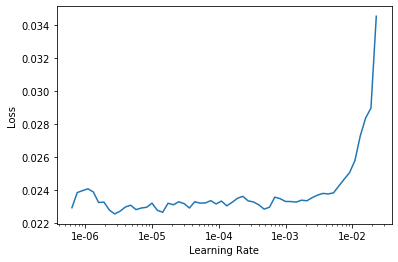

In [28]:
learn.lr_find()
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(10, max_lr=3e-6)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.024556,0.027751,0.188679,00:00
1,0.023460,0.029581,0.189326,00:00
2,0.022135,0.028152,0.185210,00:00
3,0.022010,0.027165,0.180922,00:00
4,0.022509,0.030482,0.185977,00:00
5,0.022618,0.027973,0.188313,00:00
6,0.022429,0.030045,0.186611,00:00
7,0.022070,0.031109,0.187588,00:00
8,0.022503,0.026988,0.183573,00:00
9,0.023200,0.031994,0.191401,00:00


In [22]:
print('train preds are ',learn.get_preds(ds_type=DatasetType.Test)[:10])
print('valid preds are ',learn.get_preds(ds_type=DatasetType.Test)[:10])

train preds are  [tensor([[10.7859],
        [10.4199],
        [10.3582],
        ...,
        [ 9.5932],
        [10.8228],
        [-4.2912]]), tensor([0, 0, 0,  ..., 0, 0, 0])]


In [23]:
def create_submission(learn:Learner, name='model'):
    name = name + '_submission.csv'
    
    test_data = pd.read_csv('/home/ubuntu/Kaggle/HousePrice/test.csv')
    result = pd.DataFrame(columns=['Id', 'SalePrice'])
    preds, _ = learn.get_preds(ds_type=DatasetType.Test)
    print(preds)
    result['SalePrice'] = np.exp(preds).numpy().T[0]
    result['Id'] = test_data['Id'].T
    return result

In [24]:
sub = create_submission(learn)

tensor([[10.7859],
        [10.4199],
        [10.3582],
        ...,
        [ 9.5932],
        [10.8228],
        [-4.2912]])


In [25]:
sub

,Id,SalePrice
0,1461,48334.417969
1,1462,33518.867188
2,1463,31515.878906
3,1464,29434.724609
4,1465,38007.648438
5,1466,19529.111328
6,1467,34204.847656
7,1468,25274.476562
8,1469,31154.738281
9,1470,22449.785156


In [26]:
sub.to_csv('fastaisubmission2.csv',index = False)

In [111]:
len(result)

1459

In [27]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f fastaisubmission2.csv -m "Working"

100%|██████████████████████████████████████| 21.0k/21.0k [00:00<00:00, 33.4kB/s]
Successfully submitted to House Prices: Advanced Regression Techniques

In [114]:
result

,Id,SalePrice
0,1462,1389.850952
1,1463,4835.172852
2,1464,5958.531250
3,1465,8406.394531
4,1466,3291.438721
5,1467,7059.834473
6,1468,3761.512207
7,1469,6642.880859
8,1470,4172.602051
9,1471,11810.804688


## Inference

In [30]:
row = df.iloc[0]

In [31]:
row

MSSubClass            60
MSZoning              RL
LotFrontage           65
LotArea             8450
Street              Pave
Alley                NaN
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood     CollgCr
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        2Story
OverallQual            7
OverallCond            5
YearBuilt           2003
YearRemodAdd        2003
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType       BrkFace
MasVnrArea           196
ExterQual              3
ExterCond              2
Foundation         PConc
BsmtQual               3
                  ...   
BedroomAbvGr           3
KitchenAbvGr           1
KitchenQual            3
TotRmsAbvGrd           8
Functional             7
Fireplaces             0
FireplaceQu          NaN
GarageType        Attchd
GarageYrBlt         2003


In [49]:
_, _, predSingle  = learn.predict(row)

In [50]:
predSingle

tensor([12.1801])

In [51]:
np.exp(predSingle.numpy()).T[0]

194872.62

In [55]:
validPreds,_ = learn.get_preds(ds_type=DatasetType.Valid)

In [70]:
actual = data.valid_ds.y.items

In [71]:
predictedTr = np.exp(validPreds)

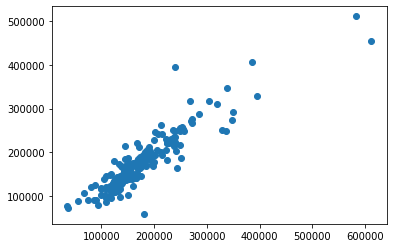

In [73]:
plt.scatter(actual,predictedTr)